In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler

from sklearn.model_selection import GridSearchCV
#from tabulate import tabulate


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [3]:
# !pip install lazypredict
# import lazypredict

In [4]:
train_data=pd.read_csv('/kaggle/input/titanic/train.csv')
print('Shape of training data is:\n',train_data.shape)
test_data=pd.read_csv('/kaggle/input/titanic/test.csv')
print('Shape of test data is:\n',test_data.shape)


Shape of training data is:
 (891, 12)
Shape of test data is:
 (418, 11)





# EDA

In [5]:
#train_data.Name.head(50)

In [6]:
def df_with_initial_checks(df):
    
    # displaying the DataFrame
    print(color.BOLD+color.RED+"Shape of dataframe is:\n"+color.END,df.shape)
    print()
    display(df.head())
    print()

    # info for null check and data types & describe for mean,std, min , max etc,
    display(df.info())
    print()
    display(df.describe())
    print()

    # skewness
    print(color.PURPLE+color.BOLD+'Skewness of data:\n'+color.END)
    display(df.skew())
    plt.hist(df.skew(),bins=50,color='red')
    plt.xlabel('Skewness')
    plt.ylabel('No of columns')
    plt.title('Distribution of Skewness across various columns')
    print()

    # check for duplicates
    print(color.BOLD+color.GREEN+'Duplicates : '+color.END,df.duplicated().sum())
    print()

    # check for null values
    null_columns = df.columns[df.isnull().any()]
    print(color.BOLD+color.BLUE+'NUll values across columns: \n'+color.END,df[null_columns].isnull().sum())
    print()
    print(color.BOLD+color.YELLOW+'Total null values across entire data: \n'+color.END,df.isnull().sum().sum())
    
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'


Shape of dataframe is:
 (891, 12)



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



Skewness of data:



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  app.launch_new_instance()


PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64


Duplicates :  0

NUll values across columns: 
 Age         177
Cabin       687
Embarked      2
dtype: int64

Total null values across entire data: 
 866


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


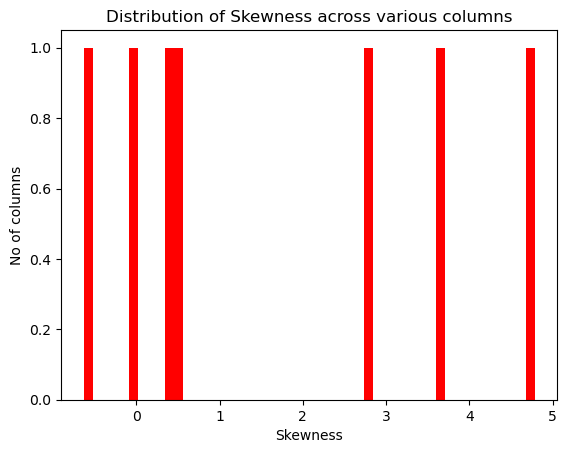

In [7]:
df_with_initial_checks(train_data)

Shape of dataframe is:
 (418, 11)



,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


None

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200



Skewness of data:



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  app.launch_new_instance()


PassengerId    0.000000
Pclass        -0.534170
Age            0.457361
SibSp          4.168337
Parch          4.654462
Fare           3.687213
dtype: float64


Duplicates :  0

NUll values across columns: 
 Age       86
Fare       1
Cabin    327
dtype: int64

Total null values across entire data: 
 414


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


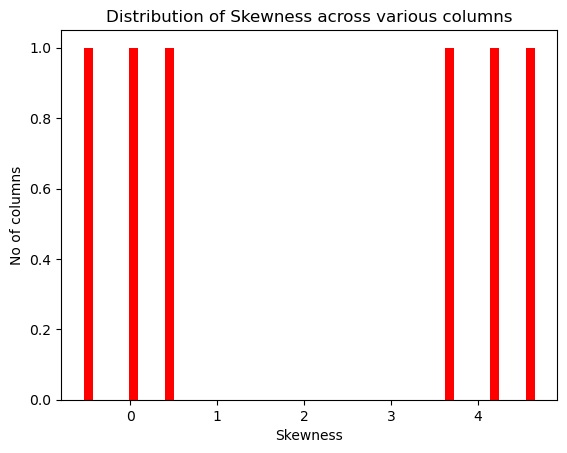

In [8]:
df_with_initial_checks(test_data)

**Vizualizing null values**

<AxesSubplot:>

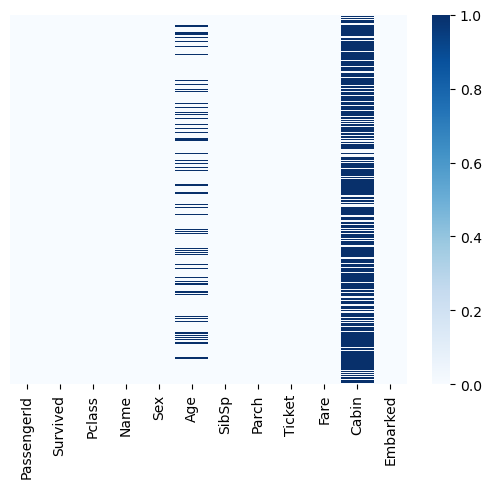

In [9]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=True,cmap="Blues")

<AxesSubplot:>

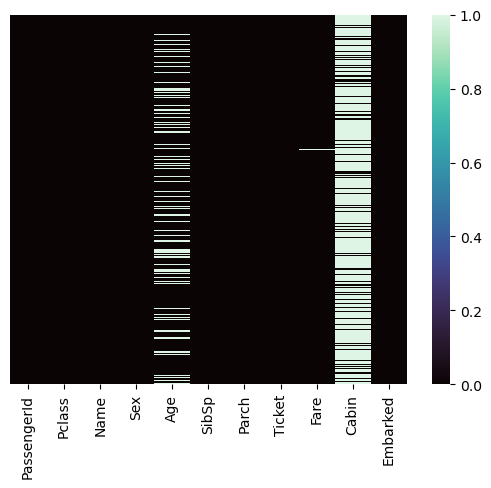

In [10]:
sns.heatmap(test_data.isnull(),yticklabels=False,cbar=True,cmap="mako")

In [11]:
train_data.skew()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

Here we can see that SibSp,Parch and Fare are **positively skewed**. So we need to make some transformation to make it symmetrical , but we **can't go for np.log** since they can also **zero** as their values

In [12]:
train_data['SibSp']=np.sqrt(train_data['SibSp'])
train_data['Parch']=np.sqrt(train_data['Parch'])
train_data['Fare']=np.sqrt(train_data['Fare'])


In [13]:
train_data.skew()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          1.436526
Parch          1.529799
Fare           2.085004
dtype: float64

****Lets visualize the data ****

<AxesSubplot:xlabel='Survived', ylabel='count'>

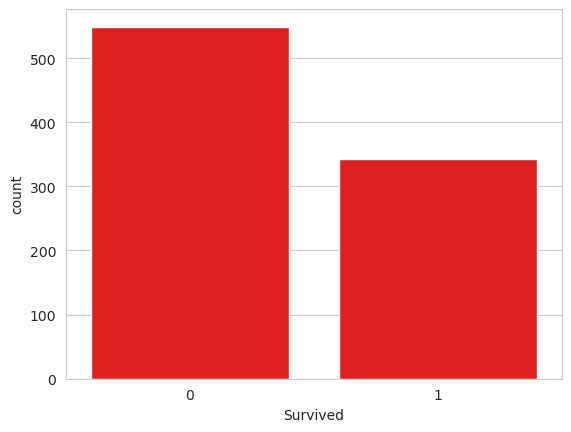

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train_data,color='r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

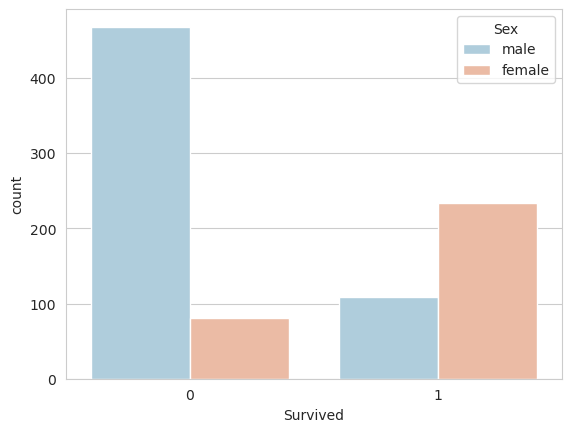

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train_data,color='r',palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

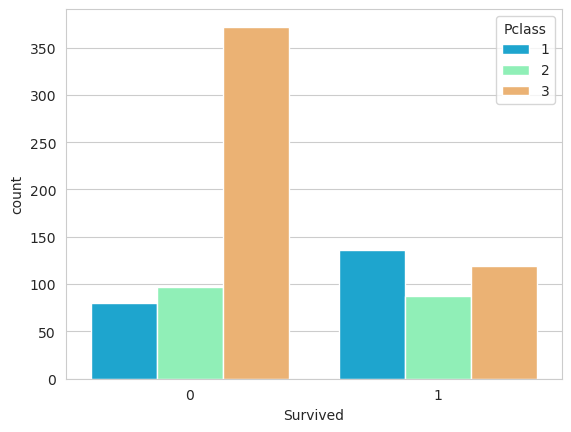

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train_data,color='r',palette='rainbow')

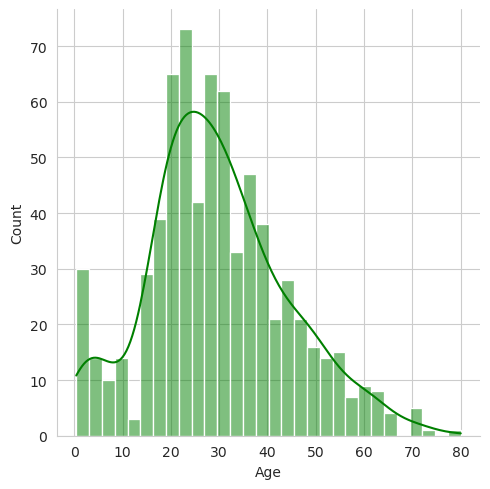

In [17]:
sns.displot(train_data['Age'].dropna(),color='green',bins=30,kde=True)

**Distribution can also be observed via histograms**

<AxesSubplot:>

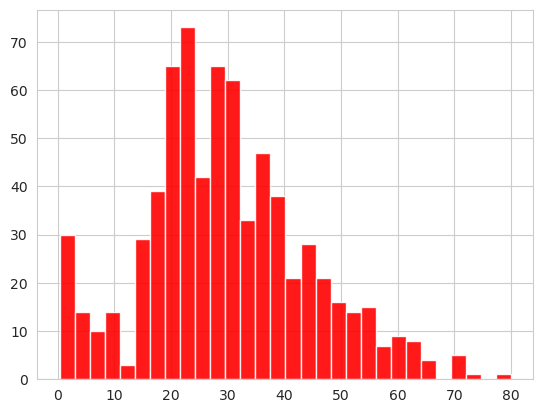

In [18]:
train_data['Age'].hist(bins=30,color='red',alpha=0.9)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

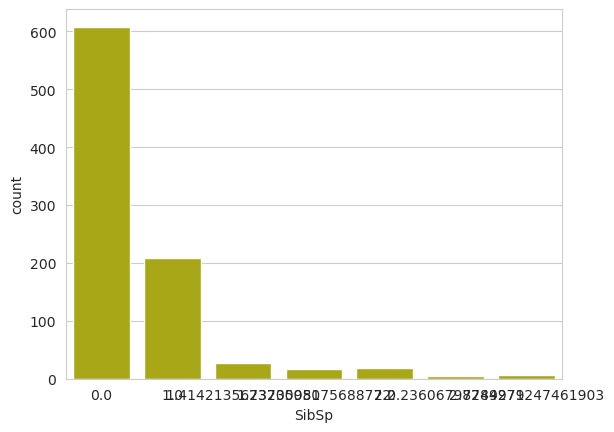

In [19]:
sns.set_style('whitegrid')
sns.countplot(x='SibSp',data=train_data,color='y')

# Data Cleaning

imputing age values 

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

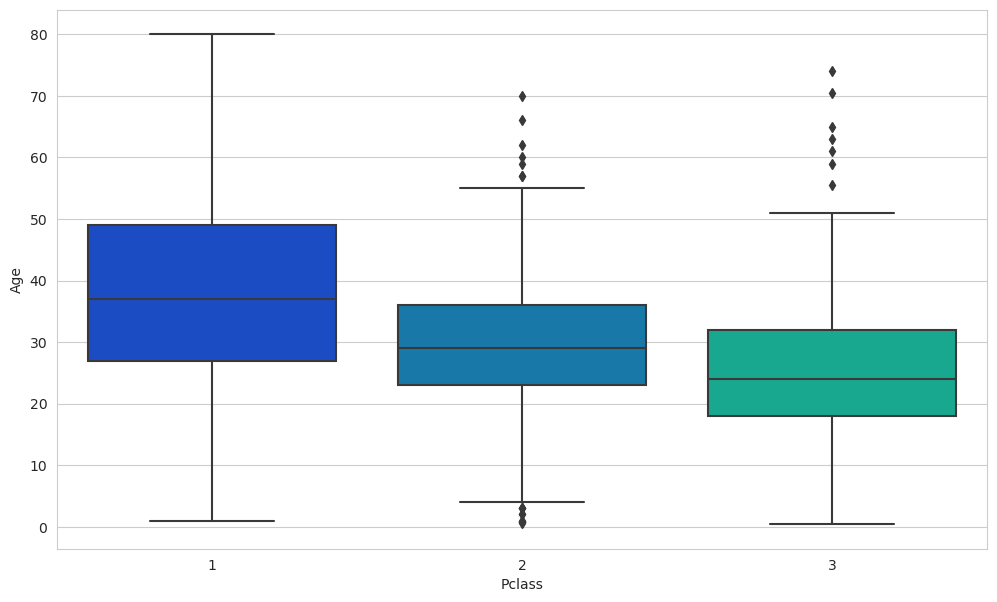

In [20]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train_data,palette='winter')

In [21]:
train_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.063602,0.000348,0.004035
Survived,-0.005007,1.000000,-0.338481,-0.077221,0.043535,0.121652,0.312508
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.006049,-0.006792,-0.660850
Age,0.036847,-0.077221,-0.369226,1.000000,-0.250509,-0.254024,0.118042
SibSp,-0.063602,0.043535,0.006049,-0.250509,1.000000,0.473591,0.309346
Parch,0.000348,0.121652,-0.006792,-0.254024,0.473591,1.000000,0.320344
Fare,0.004035,0.312508,-0.660850,0.118042,0.309346,0.320344,1.000000


In [22]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
       
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
            
        if Pclass == 1:
            return 29
        
        else:
            return 24
            
    else:
        return Age
        

**Applying the function**

In [23]:
train_data['Age']=train_data[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

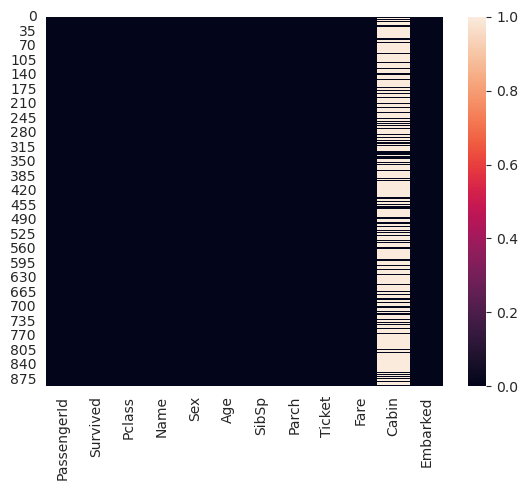

In [24]:
sns.heatmap(train_data.isnull())

In [25]:
train_data.drop('Cabin',axis=1,inplace=True)
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0.000000,A/5 21171,2.692582,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.000000,PC 17599,8.442944,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0.000000,STON/O2. 3101282,2.815138,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.000000,113803,7.286975,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0.0,0.000000,373450,2.837252,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0.0,0.000000,211536,3.605551,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0.0,0.000000,112053,5.477226,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1.0,1.414214,W./C. 6607,4.842520,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0.0,0.000000,111369,5.477226,C


In [26]:
train_data['Fare']=train_data['Fare'].fillna(train_data['Fare'].mode()[0])

In [27]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0.000000,A/5 21171,2.692582,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.000000,PC 17599,8.442944,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0.000000,STON/O2. 3101282,2.815138,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.000000,113803,7.286975,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0.0,0.000000,373450,2.837252,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0.0,0.000000,211536,3.605551,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0.0,0.000000,112053,5.477226,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1.0,1.414214,W./C. 6607,4.842520,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0.0,0.000000,111369,5.477226,C


# Converting categorical features

In [28]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    float64
 7   Parch        891 non-null    float64
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(4), int64(3), object(4)
memory usage: 76.7+ KB


In [29]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.004680,0.385286,0.293409,4.851220
std,257.353842,0.486592,0.836071,13.256357,0.612359,0.543909,2.946119
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,2.812542
50%,446.000000,0.000000,3.000000,25.000000,0.000000,0.000000,3.801868
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,5.567764
max,891.000000,1.000000,3.000000,80.000000,2.828427,2.449490,22.634690


In [30]:
pd.get_dummies(train_data['Embarked'],drop_first=True)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [31]:
train_data.shape

(891, 11)

In [32]:
sex=pd.get_dummies(train_data['Sex'],drop_first=True)
embarked=pd.get_dummies(train_data['Embarked'],drop_first=True)

In [33]:
train_data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [34]:
train_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1.0,0.0,2.692582
1,2,1,1,38.0,1.0,0.0,8.442944
2,3,1,3,26.0,0.0,0.0,2.815138
3,4,1,1,35.0,1.0,0.0,7.286975
4,5,0,3,35.0,0.0,0.0,2.837252


In [35]:
scaler = StandardScaler()

df_scaled = scaler.fit_transform(train_data.loc[:, ['Age', 'Fare','SibSp','Parch']])
df_scaled = pd.DataFrame(df_scaled, columns=['Age', 'Fare','SibSp','Parch'])

In [36]:
df_scaled.head()

,Age,Fare,SibSp,Parch
0,-0.528698,-0.733117,1.004410,-0.539747
1,0.678948,1.219822,1.004410,-0.539747
2,-0.226787,-0.691495,-0.629537,-0.539747
3,0.452514,0.827232,1.004410,-0.539747
4,0.452514,-0.683984,-0.629537,-0.539747


In [37]:
train_data=pd.concat([df_scaled,train_data.drop(['Age', 'Fare','SibSp','Parch'],axis=1),sex,embarked],axis=1)

In [38]:
train_data

,Age,Fare,SibSp,Parch,PassengerId,Survived,Pclass,male,Q,S
0,-0.528698,-0.733117,1.004410,-0.539747,1,0,3,1,0,1
1,0.678948,1.219822,1.004410,-0.539747,2,1,1,0,0,0
2,-0.226787,-0.691495,-0.629537,-0.539747,3,1,3,0,0,1
3,0.452514,0.827232,1.004410,-0.539747,4,1,1,0,0,1
4,0.452514,-0.683984,-0.629537,-0.539747,5,0,3,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,-0.151309,-0.423054,-0.629537,-0.539747,887,0,2,1,0,1
887,-0.755132,0.212604,-0.629537,-0.539747,888,1,1,0,0,1
888,-0.377743,-0.002955,1.004410,2.061805,889,0,3,0,0,1
889,-0.226787,0.212604,-0.629537,-0.539747,890,1,1,1,0,0


# Model Implemetation

In [39]:
Y_train= train_data['Survived']
X_train= train_data.drop('Survived',axis=1)

In [40]:
from sklearn.model_selection import train_test_split
# separate dataset into train and test
X_train, X_val, Y_train, Y_val = train_test_split(X_train,Y_train,test_size=0.2,random_state=8)

X_train.shape, X_val.shape

In [41]:
# from lazypredict.Supervised import LazyClassifier

# clf = LazyClassifier(verbose=0,ignore_warnings=False, custom_metric=None)
# models,predictions = clf.fit(X_train.drop('PassengerId',axis=1).values, X_val.drop('PassengerId',axis=1).values, Y_train.values, Y_val.values)
# print(models)

In [42]:
# from sklearn.svm import SVC  
# # from sklearn.model_selection import GridSearchCV

# model = SVC(kernel='linear') 

# # GRID SEARCH FOR 20 COMBINATIONS OF PARAMETERS
# grid_list = {"C": np.arange(2, 10, 2),
#              "gamma": np.arange(0.1, 1, 0.2)}

# grid_search = GridSearchCV(model, param_grid = grid_list, n_jobs = 4, cv = 3) 
# grid_search.fit(X_train.drop('PassengerId',axis=1),Y_train) 
# grid_search.cv_results_

  
# #model.fit(X_train.drop('PassengerId',axis=1),Y_train)

In [43]:
# import lightgbm as lgb

# params = {
#     'application': 'binary', # for binary classification
# #     'num_class' : 1, # used for multi-classes
#     'boosting': 'gbdt', # traditional gradient boosting decision tree
#     'num_iterations': 100, 
#     'learning_rate': 0.05,
#     'num_leaves': 62,
#     'device': 'cpu', # you can use GPU to achieve faster learning
#     'max_depth': -1, # <0 means no limit
#     'max_bin': 510, # Small number of bins may reduce training accuracy but can deal with over-fitting
#     'lambda_l1': 5, # L1 regularization
#     'lambda_l2': 10, # L2 regularization
#     'metric' : 'binary_error',
#     'subsample_for_bin': 200, # number of samples for constructing bins
#     'subsample': 1, # subsample ratio of the training instance
#     'colsample_bytree': 0.8, # subsample ratio of columns when constructing the tree
#     'min_split_gain': 0.5, # minimum loss reduction required to make further partition on a leaf node of the tree
#     'min_child_weight': 1, # minimum sum of instance weight (hessian) needed in a leaf
#     'min_child_samples': 5# minimum number of data needed in a leaf
# }

# # Initiate classifier to use
# model = lgb.LGBMClassifier(boosting_type= 'gbdt', 
#           objective = 'binary', 
#           n_jobs = 5, 
#           silent = True,
#           max_depth = params['max_depth'],
#           max_bin = params['max_bin'], 
#           subsample_for_bin = params['subsample_for_bin'],
#           subsample = params['subsample'], 
#           min_split_gain = params['min_split_gain'], 
#           min_child_weight = params['min_child_weight'], 
#           min_child_samples = params['min_child_samples'])

# # To view the default model parameters:
# model.get_params().keys()



In [44]:
# gridParams = {
#     'learning_rate': [0.005, 0.01],
#     'n_estimators': [8,16,24],
#     'num_leaves': [6,8,12,16], # large num_leaves helps improve accuracy but might lead to over-fitting
#     'boosting_type' : ['gbdt', 'dart'], # for better accuracy -> try dart
#     'objective' : ['binary'],
#     'max_bin':[255, 510], # large max_bin helps improve accuracy but might slow down training progress
#     'random_state' : [500],
#     'colsample_bytree' : [0.64, 0.65, 0.66],
#     'subsample' : [0.7,0.75],
#     'reg_alpha' : [1,1.2],
#     'reg_lambda' : [1,1.2,1.4],
#     }

# grid = GridSearchCV(model, gridParams, verbose=1, cv=4, n_jobs=-1)
# # Run the grid
# grid.fit(X_train.drop('PassengerId',axis=1), Y_train)

# # Print the best parameters found
# print(grid.best_params_)
# print(grid.best_score_)

In [45]:
# #LOGISTIC REGRESION
# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression(random_state = 0)
# model.fit(X_train.drop('PassengerId',axis=1),Y_train)

#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 100)  
model.fit(X_train.drop('PassengerId',axis=1), Y_train)


# #XGBOOST
# import xgboost as xgb
# model = xgb.XGBClassifier()
# model.fit(X_train.drop('PassengerId',axis=1),Y_train)


# #KNN
# from sklearn.neighbors import KNeighborsClassifier 
# model = KNeighborsClassifier(n_neighbors = 5) 
# model.fit(X_train.drop('PassengerId',axis=1), Y_train)


# #LGBM
# import lightgbm as lgb
# from lightgbm import LGBMClassifier
# model = LGBMClassifier()
# model.fit(X_train.drop('PassengerId',axis=1), Y_train)


# #SVM
# from sklearn.svm import SVC  
# model = SVC(kernel='linear') 
# model.fit(X_train.drop('PassengerId',axis=1), Y_train)


RandomForestClassifier()

In [46]:
X_train.drop('PassengerId',axis=1)

,Age,Fare,SibSp,Parch,Pclass,male,Q,S
0,-0.528698,-0.733117,1.004410,-0.539747,3,1,0,1
1,0.678948,1.219822,1.004410,-0.539747,1,0,0,0
2,-0.226787,-0.691495,-0.629537,-0.539747,3,0,0,1
3,0.452514,0.827232,1.004410,-0.539747,1,0,0,1
4,0.452514,-0.683984,-0.629537,-0.539747,3,1,0,1
...,...,...,...,...,...,...,...,...
886,-0.151309,-0.423054,-0.629537,-0.539747,2,1,0,1
887,-0.755132,0.212604,-0.629537,-0.539747,1,0,0,1
888,-0.377743,-0.002955,1.004410,2.061805,3,0,0,1
889,-0.226787,0.212604,-0.629537,-0.539747,1,1,0,0


In [47]:
predictions=model.predict(X_val.drop('PassengerId',axis=1))
predictions

In [49]:
from sklearn.metrics import confusion_matrix
accuracy = confusion_matrix(Y_val, predictions)
accuracy

In [50]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_val, predictions)
accuracy

# Preparing Test set

In [51]:
test_data=pd.read_csv('/kaggle/input/titanic/test.csv')
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [52]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:>

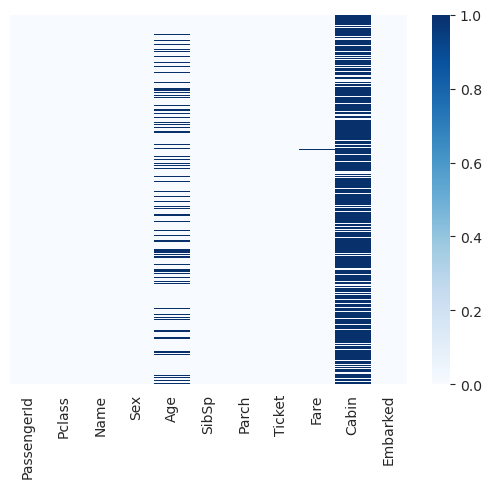

In [53]:
sns.heatmap(test_data.isnull(),yticklabels=False,cbar=True,cmap="Blues")

In [54]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
       
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
            
        if Pclass == 1:
            return 29
        
        else:
            return 24
            
    else:
        return Age
        

In [55]:
test_data['Age']=test_data[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

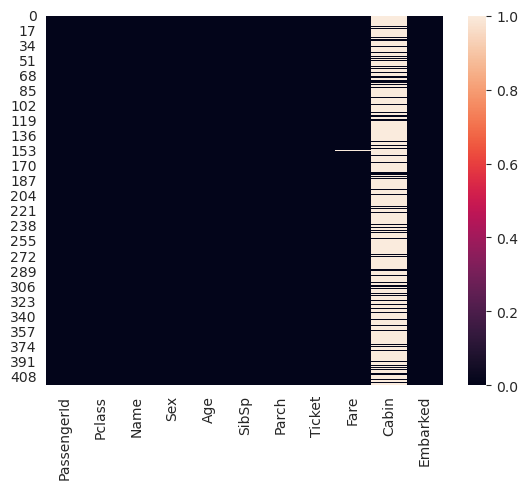

In [56]:
sns.heatmap(test_data.isnull())

In [57]:
test_data['Fare']=test_data['Fare'].fillna(test_data['Fare'].median())

In [58]:
test_data['SibSp']=np.sqrt(test_data['SibSp'])
test_data['Parch']=np.sqrt(test_data['Parch'])
test_data['Fare']=np.sqrt(test_data['Fare'])

In [59]:
test_data.drop('Cabin',axis=1,inplace=True)

<AxesSubplot:>

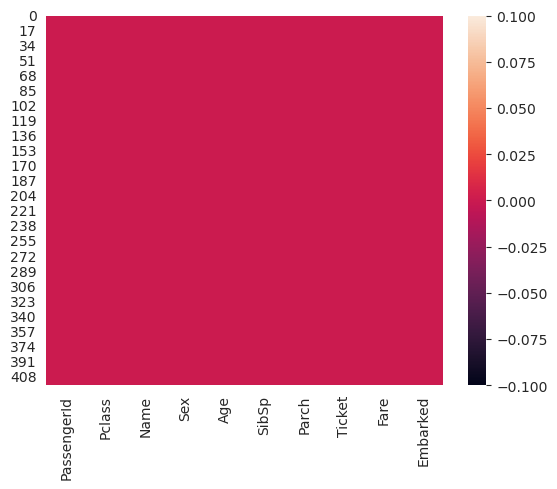

In [60]:
sns.heatmap(test_data.isnull())

In [61]:
sex=pd.get_dummies(test_data['Sex'],drop_first=True)
embarked=pd.get_dummies(test_data['Embarked'],drop_first=True)


In [62]:
test_data.drop(['Sex','Name','Ticket','Embarked'],axis=1,inplace=True)



In [63]:
test_data

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892,3,34.5,0.0,0.0,2.798071
1,893,3,47.0,1.0,0.0,2.645751
2,894,2,62.0,0.0,0.0,3.112475
3,895,3,27.0,0.0,0.0,2.943213
4,896,3,22.0,1.0,1.0,3.505353
...,...,...,...,...,...,...
413,1305,3,24.0,0.0,0.0,2.837252
414,1306,1,39.0,0.0,0.0,10.435516
415,1307,3,38.5,0.0,0.0,2.692582
416,1308,3,24.0,0.0,0.0,2.837252


In [64]:
scaler = StandardScaler()

df_scaled = scaler.fit_transform(test_data.loc[:, ['Age', 'Fare','SibSp','Parch']])
df_scaled = pd.DataFrame(df_scaled, columns=['Age', 'Fare','SibSp','Parch'])

In [65]:
test_data=pd.concat([df_scaled,test_data.drop(['Age', 'Fare','SibSp','Parch'],axis=1),sex,embarked],axis=1)

In [66]:
test_data['Age']=test_data['Age'].fillna(test_data['Age'].median())

In [67]:
test_data

,Age,Fare,SibSp,Parch,PassengerId,Pclass,male,Q,S
0,0.406000,-0.697314,-0.651526,-0.507826,892,3,1,1,0
1,1.374875,-0.744869,1.132891,-0.507826,893,3,0,0,1
2,2.537524,-0.599156,-0.651526,-0.507826,894,2,1,1,0
3,-0.175325,-0.652000,-0.651526,-0.507826,895,3,1,0,1
4,-0.562874,-0.476499,1.132891,1.282726,896,3,0,0,1
...,...,...,...,...,...,...,...,...,...
413,-0.407854,-0.685082,-0.651526,-0.507826,1305,3,1,0,1
414,0.754795,1.687116,-0.651526,-0.507826,1306,1,0,0,0
415,0.716040,-0.730248,-0.651526,-0.507826,1307,3,1,0,1
416,-0.407854,-0.685082,-0.651526,-0.507826,1308,3,1,0,1


# Model Testing

In [68]:
result=model.predict(test_data.drop('PassengerId',axis=1))
result

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [69]:
df = pd.DataFrame({'PassengerId':test_data.PassengerId,'Survived':result})
df.to_csv('no_val.csv',index=False)

# df=pd.DataFrame()
# df['PassengerId']=test_data.iloc[:,0]
# df['Survived']=result
# df.loc[:,['PassengerId','Survived']].to_csv('submission_xgb.csv')